In [1]:
import sys
sys.path.append("..")

import torch
import numpy as np

from src.data import load_cora
from src.features.cora_feature import split
from src.models import train_cora
from src.models.mlp_node import MLPNode

In [2]:
# reproducibility
random_seed = 123
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

## Load the Dataset

In [3]:
graph, num_inputs, num_outputs = load_cora.load()
graph

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

### Split the data into train, validation, and test

In [4]:
graph = split(graph)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
training samples 1895
validation samples 542
test samples 271


## Training & Result

Can run on GPU (cuda:0)

Pre-training prepare
	Run on: cuda:0
	Optimizer with 0.001 leraning rate and 0.0005 weight_dacay

Begin to train:
	Epoch: 1, Training Loss: 1.9562023878097534, Validation Score: 0.07195571810007095, Test Score: 0.033210333436727524
	Epoch: 10, Training Loss: 1.8945178985595703, Validation Score: 0.2970479726791382, Test Score: 0.29520294070243835
	Epoch: 20, Training Loss: 1.7632533311843872, Validation Score: 0.3025830388069153, Test Score: 0.30627307295799255
	Epoch: 30, Training Loss: 1.5616371631622314, Validation Score: 0.3247232437133789, Test Score: 0.33210331201553345
	Epoch: 40, Training Loss: 1.3163679838180542, Validation Score: 0.45571956038475037, Test Score: 0.468634694814682
	Epoch: 50, Training Loss: 1.0412999391555786, Validation Score: 0.5756457448005676, Test Score: 0.61623615026474
	Epoch: 60, Training Loss: 0.7666237354278564, Validation Score: 0.6383763551712036, Test Score: 0.7121770977973938
	Epoch: 70, Training Loss: 0.5323876142501831,

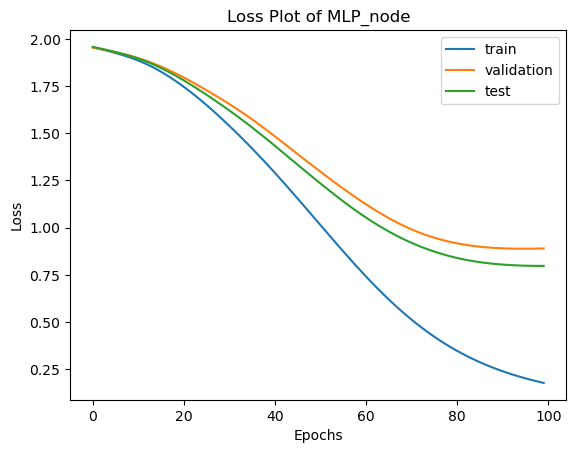

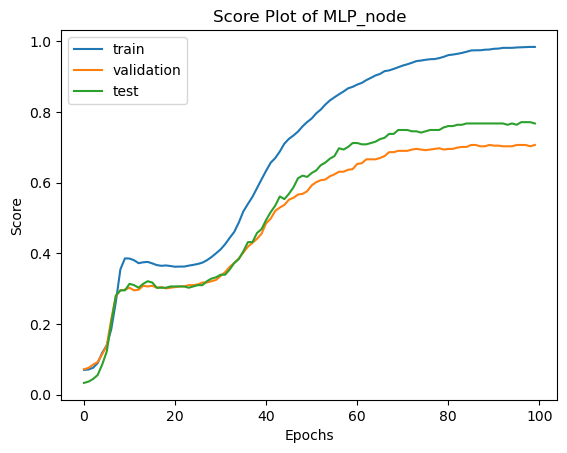

In [5]:
device = train_cora.GPU()
model = MLPNode(num_inputs=num_inputs, num_outputs=num_outputs, seed=random_seed)
criterion = torch.nn.CrossEntropyLoss()
train_cora.start_train(model, graph, criterion, model_name="MLP_node", device=device)